
Estimated values:  [2.65373473 0.73071656 3.40644976]
Actual values:  [2.471435163732493, 0.8090243052935355, 3.432706968426097]

Estimated values:  [2.36370595 0.94886426 3.44702129 2.17840019 1.33473781]
Actual values:  [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]

Estimated values:  [2.39307201 0.71574571 3.55602818 1.50137215 1.21939186 3.12482243
 2.74457282]
Actual values:  [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884, 2.8871629403077383, 2.8595884137174163]

Estimated values:  [ 2.52778452  0.71621081  3.72736043  1.6666399   0.99246052  3.18496266
  3.09686572  1.48767679  2.34672365 -0.04532862]
Actual values:  [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884, 2.8871629403077383, 2.8595884137174163, 1.3634764955826508, 2.0156963721144288, -0.24268495418540548]


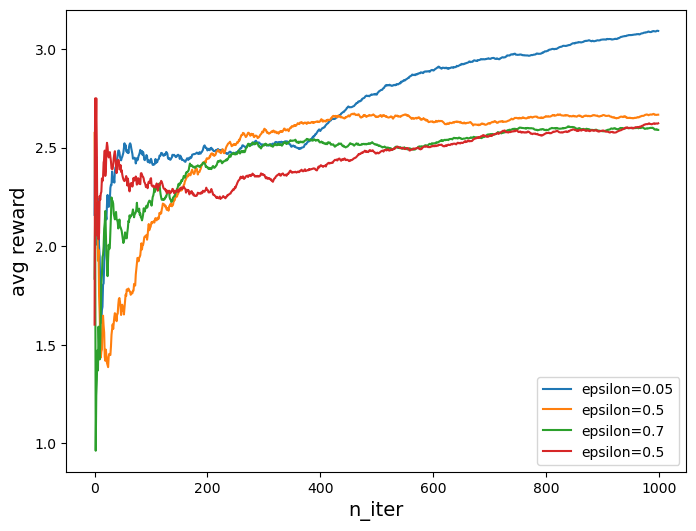

In [1]:
# Import the numpy library for numerical computations
import numpy as np
# Import the matplotlib.pyplot library for plotting
import matplotlib.pyplot as plt

# Define a class named Bandit to model the bandit problem
class Bandit:
    # Initialize a Bandit object with default parameters for arms, epsilon, alpha, and seed
    def __init__(self, arms=15, epsilon=.3, alpha=0.1, seed=None):
        self.arms = arms  # Set the number of arms
        self.actions = range(self.arms)  # Create a range of actions equal to the number of arms
        self.epsilon = epsilon  # Set the exploration rate
        self.alpha = alpha  # Set the step-size parameter for value update
        self.total_reward = 0  # Initialize the total reward to 0
        self.avg_reward = []  # Initialize a list to keep track of average rewards

        self.actualValue = []  # Initialize a list to store the true rewards for each arm
        np.random.seed(seed)  # Set the random seed for reproducibility

        # Initialize true rewards for each arm with random values drawn from a normal distribution
        for i in range(self.arms):
            self.actualValue.append(np.random.randn() + 2)

        # Initialize the estimated values of each arm to zeros
        self.values = np.zeros(self.arms)
        self.times = 0  # Initialize a counter for the total number of taken actions
        self.action_times = np.zeros(self.arms)  # Initialize a counter for the number of times each action is taken
        
    # Define a method to choose the next action based on the epsilon-greedy strategy
    def chooseAction(self):
        # With probability epsilon, choose a random action (exploration)
        if np.random.uniform(0, 1) <= self.epsilon:
            action = np.random.choice(self.actions)
        # Otherwise, choose the action with the highest estimated value (exploitation)
        else:
            action = np.argmax(self.values)
        return action  # Return the chosen action

    # Define a method to take an action and update internal state
    def takeAction(self, action):
        self.times += 1  # Increment the total action counter
        self.action_times[action] += 1  # Increment the counter for the chosen action
        
        # Calculate the reward for the taken action with added randomness
        reward = np.random.randn() + self.actualValue[action]
      
        # Update the estimated value of the taken action using the incremental update rule
        self.values[action] += self.alpha * (reward - self.values[action])

        # Update the total reward and average reward history
        self.total_reward += reward
        self.avg_reward.append(self.total_reward / self.times)

    # Define a method to simulate playing the bandit game for a number of iterations
    def play(self, n):
        for _ in range(n):  # Loop over the specified number of iterations
            action = self.chooseAction()  # Choose an action
            self.takeAction(action)  # Take the chosen action

# This block is executed if the script is run directly
if __name__ == "__main__":
    # Create and play the bandit game with epsilon=0.05 and seed=1234 for 1000 iterations
    bdt = Bandit(arms=3, epsilon=0.05, seed=1234)
    bdt.play(1000)
    # Print the estimated and actual values of each arm
    print("\nEstimated values: ", bdt.values)
    print("Actual values: ", bdt.actualValue)
    avg_reward1 = bdt.avg_reward  # Store the average reward history

    # Repeat the experiment with epsilon=0.5
    bdt = Bandit(arms=5, epsilon=0.5, seed=1234)
    bdt.play(1000)
    print("\nEstimated values: ", bdt.values)
    print("Actual values: ", bdt.actualValue)
    avg_reward2 = bdt.avg_reward

    # Repeat the experiment with epsilon=0.7
    bdt = Bandit(arms=7, epsilon=0.7, seed=1234)
    bdt.play(1000)
    print("\nEstimated values: ", bdt.values)
    print("Actual values: ", bdt.actualValue)
    avg_reward3 = bdt.avg_reward

    # Repeat the experiment with epsilon=0.5
    bdt = Bandit(arms=10, epsilon=0.5, seed=1234)
    bdt.play(1000)
    print("\nEstimated values: ", bdt.values)
    print("Actual values: ", bdt.actualValue)
    avg_reward4 = bdt.avg_reward

    # Plot the average rewards over iterations for each epsilon value
    plt.figure(figsize=[8, 6])  # Set the figure size
    plt.plot(avg_reward1, label="epsilon=0.05")  # Plot avg_reward1 with a label
    plt.plot(avg_reward2, label="epsilon=0.5")  # Plot avg_reward2 with a label
    plt.plot(avg_reward3, label="epsilon=0.7")  # Plot avg_reward3 with a label
    plt.plot(avg_reward4, label="epsilon=0.5")

    # Label the x-axis as "n_iter" and y-axis as "avg reward" with font size 14
    plt.xlabel("n_iter", fontsize=14)
    plt.ylabel("avg reward", fontsize=14)
    plt.legend()  # Display the legend

In [2]:
# Results:
#
# Looking at both the estimated values, it looks like the experiment with an epsilon value of
# 0.05 with 3 arms gives the best estimates compared to the actual true values. This would 
# suggest that less exploration can be helpful in the case where there is a simple environment 
# given fewer arms. However, if we wanted more exploration and exploitation, than the 
# experiment with an epsilon value of 0.5 with 5 arms would be another good choice.